# 差分进化算法
没有跳出局部最优的操作
!!! 求最小值可将适应度函数乘以-1

参考：[matlab实现](https://www.jianshu.com/p/6c2d24ac57b2)

----
ex.：max = sin(x^2) + cos(x^5)，x在[1,2]。 lingo计算得1.441235，最值为1.8

In [11]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [9]:
def CalFitness(x=[]): #fitness function calculation
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    return math.sin(pow(x[0],2))+math.cos(pow(x[0],5))

In [28]:
'''
the base of differential evolution

@args:
cross_rate: the rate of genetic crossover 
F:the shrinkage factor. The large the 'F' , the slower the convergence speed. ususally in [0,2]
gen: generation. The number of iterations
init_N: initial population, will not change. ususally in [30,50]
num_x: the number of arguments(decision variables)
bounds: ranges of independent variables,[[x1_lower bound,x1_upper bound],[x2_lower bound,x2_upper bound], ...]

@return:
colony: final result. Convergence if all values are the same
best_scores:
'''

def DE_base(cross_rate = 0,F = 0.5, gen = 10, init_n = 30, num_x = 1, bounds =[[]]): 
    best_scores = []
    
    #initialize GENES of the COLONY
    colony = []
    for i in range(init_n):
        colony.append([random.uniform(bounds[x][0],bounds[x][1]) for x in range(num_x)])  #uniform-float, randint(lower_bounds,upper_bounds)-int
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    colony = np.array(colony)

    #start iteration
    for i in range(gen):
        b_score = CalFitness(colony[0])
        
        # iteration
        for j in range(init_n):
            # variation
            parents = random.sample(range(init_n),3) #pick 3 randomly from the current population
            new = colony[parents[0]]+F*(colony[parents[1]]-colony[parents[2]])
            
            # cross
            d_rand = random.randint(0,num_x) #ensure that at least one gene will change
            for k in range(num_x):
                if random.random()>=cross_rate and k != d_rand:
                    new[k] = colony[j][k] #restore the orginal gene
                    
            # select: greedy algorithm retains the optimal individuals
            if CalFitness(new) > CalFitness(colony[j]):
                colony[j] = new # update individual
            
            tmp_score = CalFitness(colony[j])
            
            # update [best_scores]
            if tmp_score > b_score:
                b_score = tmp_score 
            
            
        best_scores.append(b_score)
            
    return colony,best_scores

In [37]:
'''
drawing function
'''
def drawProcess(best_scores = []): #绘制得分（适应度函数）变化曲线
    #绘图时显示中文
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    #设置图像大小
    plt.rcParams['figure.figsize'] = (13.0, 10.0)
    plt.subplot(111)
    
    plt.plot(best_scores, color = '#2b73af', linewidth = 3)
    
    plt.xlabel('迭代次数',fontsize = 20,verticalalignment = 'baseline',labelpad = 10)
    plt.ylabel('适应度函数值',fontsize = 20,verticalalignment = 'bottom',labelpad = 10)
    plt.tick_params(labelsize=20,pad =0.3)  # 刻度轴
    plt.savefig('./optimal/scores.png')

最终结果： [[1.4412354 ]
 [1.44123597]
 [1.44123307]
 [1.44123842]
 [1.441235  ]
 [1.4412374 ]
 [1.44123607]
 [1.4412347 ]
 [1.44123685]
 [1.441236  ]
 [1.44123421]
 [1.44123541]
 [1.44123335]
 [1.44123605]
 [1.44123514]
 [1.44123395]
 [1.44123649]
 [1.44123419]
 [1.44123721]
 [1.44123536]
 [1.44123551]
 [1.441236  ]
 [1.44123168]
 [1.44123462]
 [1.44123406]
 [1.44123593]
 [1.44123407]
 [1.44123639]
 [1.44123304]
 [1.44123493]]
迭代中适应度函数： [1.836230898873331, 1.836230898873331, 1.836230898873331, 1.867945585788046, 1.867945585788046, 1.867945585788046, 1.8713691214930144, 1.8719224477710212, 1.8719224477710212, 1.8719224477710212, 1.8724124806628946, 1.8724124806628946, 1.8724125340930793, 1.8724125340930793, 1.8724125340930793, 1.8724125340930793, 1.8724125340930793, 1.8724125623039125, 1.8724125647032979, 1.8724125647032979, 1.8724125676622871, 1.8724125676622871, 1.8724125676622871, 1.8724125676622871, 1.8724125680126702, 1.872412568184278, 1.872412568184278, 1.8724125682170465, 1.87241256

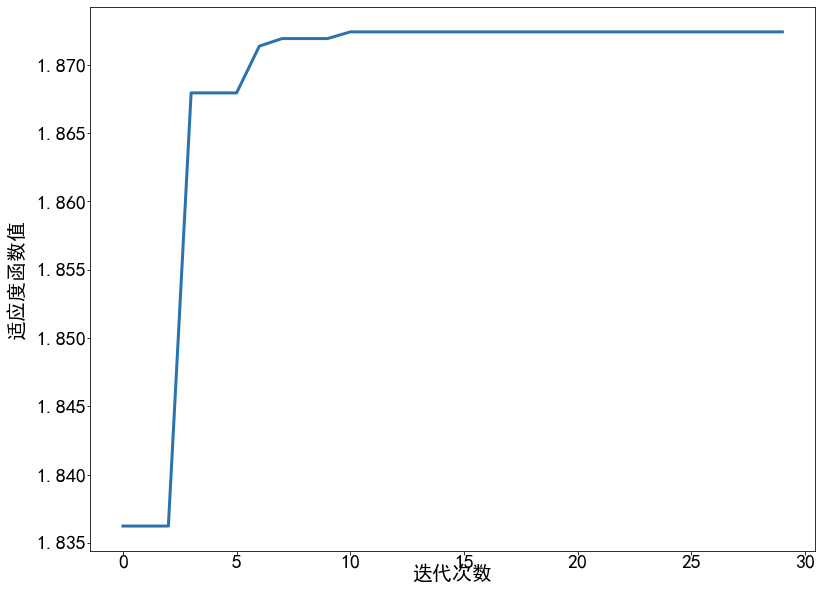

In [38]:
ans,best_scores_global = DE_base(cross_rate = 0.70,gen = 30,bounds=[[1,2]])
print('最终结果：',ans)
print('迭代中适应度函数：', best_scores_global)

drawProcess(best_scores_global)